In [2]:
import lotery as l
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from random import randint

YEARS = 70
TICKETS = 10
LIFES = 10

# La Lotería de Navidad
## Jugando cada año

In [3]:
def run_one_year(no_bar=False):
    sorteo = l.Sorteo()
    total_gain = 0
    each_gain = []
    r = range(TICKETS) if (TICKETS < 5000 or no_bar) else tqdm_notebook(range(TICKETS), leave=False, desc="Décimos")
    for num in r:
        ticket = l.Decimo(num)
        sorteo.check(ticket)
        prize = ticket.prize
        each_gain.append(prize)
        total_gain += prize - 20
    return total_gain, each_gain

def run_one_life(no_bar=False):
    earnings = [] 
    prizes = []
    r = range(YEARS) if no_bar else tqdm_notebook(range(YEARS), leave=False, desc="Años")
    for _ in r:
        total, each = run_one_year(no_bar)
        earnings.append(total)
        prizes += each
    return earnings, prizes

earnings, prizes = run_one_life()

In [4]:
def plot(per_year):
    s_earnings = pd.Series(per_year)
    s_sum = s_earnings.cumsum()

    # Config plot
    fig, ax = plt.subplots(
        2, 1, 
        sharex=True, 
        figsize=(8, 4),
        gridspec_kw={"height_ratios": [4, 1]}
    )
    fig.subplots_adjust(hspace=0)
    ax[0].set_ylabel("Ganancias Totales (€)")
    ax[0].plot(s_sum)
    ax[0].annotate(
        f"Ganancia final: {s_sum.iloc[-1]} €", 
        xy=(YEARS, s_sum.iloc[-1]),
        xytext=(YEARS / 2, s_sum.iloc[-1]),
        verticalalignment="center",
        arrowprops=dict(facecolor='black', width=1, shrink=0.1, headwidth=5)
    )

    ax[1].set_ylabel("Variación (€)")
    ax[1].set_xlabel("Años")
    ax[1].step(s_earnings.index, s_earnings)


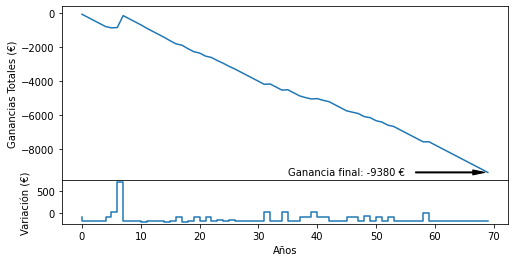

In [5]:
plot(earnings)

# ¿Qué premios tendríamos?

prize  count  probability
0      0    601    85.857143
1     20     66     9.428571
2    100     33     4.714286

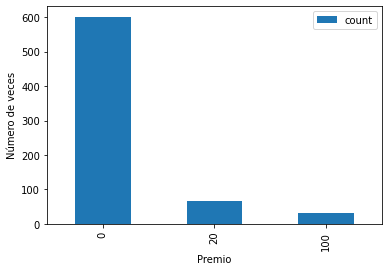

In [6]:
def life_df(earnings):
    df = pd.DataFrame({"prize": pd.Series(earnings)})
    df = df.value_counts().reset_index().sort_values("prize").rename(columns={0: "count"})
    df["probability"] = df["count"] / len(earnings) * 100
    return df
df = life_df(prizes)
ax = df.plot.bar("prize", "count", grid=False)
ax.set_xlabel("Premio")
ax.set_ylabel("Número de veces")
df

## Y si... viviera varias vidas

Text(0.5, 1.0, 'Total: -110780 € (Prob. Positivo: 0.0 %)')

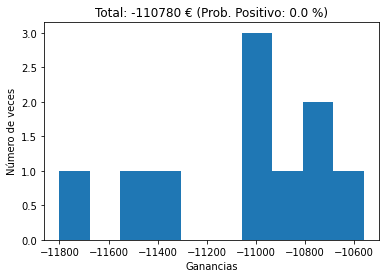

In [7]:
earn_per_life = []
for _ in tqdm_notebook(range(LIFES), desc="Vidas"):
    earns, _ = run_one_life(no_bar=True)
    earn_per_life.append(pd.Series(earns).sum())
s_all_lifes = pd.Series(earn_per_life)

ax = plt.subplot()
ax.set_xlabel("Ganancias")
ax.set_ylabel("Número de veces")
ax.hist(s_all_lifes, align="mid", bins=10)
npos = (s_all_lifes >= 0).sum()
ax.set_title(f"Total: {s_all_lifes.sum()} € (Prob. Positivo: {((npos / LIFES) * 100).round(2)} %)")

In [11]:
type(range(10))

range